In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [270]:
dataset = pd.read_csv('../Datasets/Iris.csv')

In [271]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [272]:
dataset.shape

(150, 6)

In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [274]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [275]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [276]:
dataset.drop('Id', axis=1,inplace=True)

In [277]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [278]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [279]:
le = LabelEncoder()
dataset ['En_Species'] = le.fit_transform(dataset['Species'])
y = dataset ['En_Species'] 

X = dataset.drop(['Species', 'En_Species'], axis=1)

In [280]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [281]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: En_Species, dtype: int32

# 1.) Scaling the data

In [282]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
scaled_dataset = pd.DataFrame(X_scaled, columns=X.columns)
scaled_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# 2.) Seeing the scatter plot after dimentionality reduction

In [283]:
from sklearn.decomposition import PCA

In [284]:
pca = PCA(n_components=2)
X_decomposed = pca.fit_transform(scaled_dataset)
decomposed_dataset = pd.DataFrame(X_decomposed, columns=['X1', 'X2'])
decomposed_dataset.head()

,X1,X2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [285]:
dataset['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [286]:
species = pd.DataFrame(dataset['Species'], columns=['Species'])
species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [287]:
X_decomposed = pd.concat([decomposed_dataset, species], axis=1)
X_decomposed.head()

,X1,X2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


<AxesSubplot:xlabel='X1', ylabel='X2'>

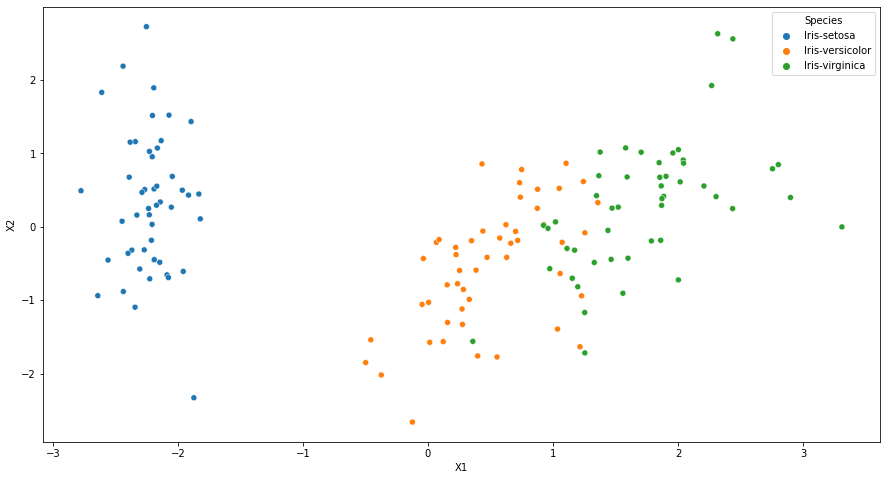

In [288]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=X_decomposed, x='X1', y='X2', hue='Species')

# 2.) KMeans

In [289]:
from sklearn.cluster import KMeans

In [290]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [291]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: En_Species, dtype: int32

In [292]:
errorList = list()

In [293]:
for k in range(1,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  errorList.append(kmeans.inertia_)

<AxesSubplot:>

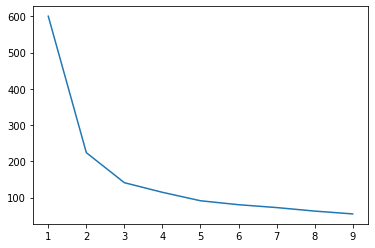

In [294]:
sns.lineplot(x=list(range(1,10)), y=errorList)

In [308]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

print('Accuracy Score: ',accuracy_score(y, y_pred))

Accuracy Score:  0.8333333333333334


In [309]:
decomposed_clusters = pca.fit_transform(kmeans.cluster_centers_)
decomposed_clusters

array([[ 2.24641469, -0.24051949],
       [-0.55372796,  0.83183931],
       [-1.69268673, -0.59131982]])

In [310]:
decomposed_clusters[:,0]

array([ 2.24641469, -0.55372796, -1.69268673])

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


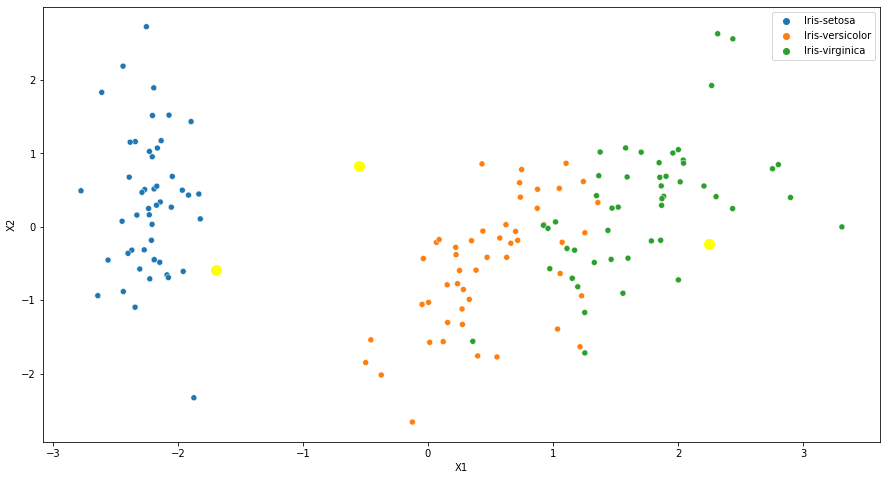

In [311]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=X_decomposed, x='X1', y='X2', hue='Species')
sns.scatterplot(decomposed_clusters[:,0], y=decomposed_clusters[:,1])
plt.scatter(decomposed_clusters[:,0], y=decomposed_clusters[:,1], s = 100, c = 'yellow')

plt.legend()